# Introduction to Machine Learning with PyTorch
## Project: Finding Donors for *CharityML*

Welcome to the first project of the Data Scientist Nanodegree! In this notebook, some template code has already been provided for you, and it will be your job to implement the additional functionality necessary to successfully complete this project. Sections that begin with **'Implementation'** in the header indicate that the following block of code will require additional functionality which you must provide. Instructions will be provided for each section and the specifics of the implementation are marked in the code block with a `'TODO'` statement. Please be sure to read the instructions carefully!

In addition to implementing code, there will be questions that you must answer which relate to the project and your implementation. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide.  

>**Note:** Please specify WHICH VERSION OF PYTHON you are using when submitting this notebook. Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

## Getting Started

In this project, you will employ several supervised algorithms of your choice to accurately model individuals' income using data collected from the 1994 U.S. Census. You will then choose the best candidate algorithm from preliminary results and further optimize this algorithm to best model the data. Your goal with this implementation is to construct a model that accurately predicts whether an individual makes more than $50,000. This sort of task can arise in a non-profit setting, where organizations survive on donations.  Understanding an individual's income can help a non-profit better understand how large of a donation to request, or whether or not they should reach out to begin with.  While it can be difficult to determine an individual's general income bracket directly from public sources, we can (as we will see) infer this value from other publically available features. 

The dataset for this project originates from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Census+Income). The datset was donated by Ron Kohavi and Barry Becker, after being published in the article _"Scaling Up the Accuracy of Naive-Bayes Classifiers: A Decision-Tree Hybrid"_. You can find the article by Ron Kohavi [online](https://www.aaai.org/Papers/KDD/1996/KDD96-033.pdf). The data we investigate here consists of small changes to the original dataset, such as removing the `'fnlwgt'` feature and records with missing or ill-formatted entries.

----
## Exploring the Data
Run the code cell below to load necessary Python libraries and load the census data. Note that the last column from this dataset, `'income'`, will be our target label (whether an individual makes more than, or at most, $50,000 annually). All other columns are features about each individual in the census database.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from time import time
from IPython.display import display # Allows the use of display() for DataFrames
import seaborn as sns

# Import supplementary visualization code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the Census dataset
data = pd.read_csv("census.csv")

# Success - Display the first record
display(data.head(n=1))

,age,workclass,education_level,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Male,2174.0,0.0,40.0,United-States,<=50K


### Implementation: Data Exploration
A cursory investigation of the dataset will determine how many individuals fit into either group, and will tell us about the percentage of these individuals making more than \$50,000. In the code cell below, you will need to compute the following:
- The total number of records, `'n_records'`
- The number of individuals making more than \$50,000 annually, `'n_greater_50k'`.
- The number of individuals making at most \$50,000 annually, `'n_at_most_50k'`.
- The percentage of individuals making more than \$50,000 annually, `'greater_percent'`.

**HINT:** You may need to look at the table above to understand how the `'income'` entries are formatted. 

In [2]:
# TODO: Total number of records
n_records = data.shape[0]

# TODO: Number of records where individual's income is more than $50,000
n_greater_50k=data['income'].eq(">50K").sum()

# TODO: Number of records where individual's income is at most $50,000
n_at_most_50k=data['income'].eq("<=50K").sum()

# TODO: Percentage of individuals whose income is more than $50,000
greater_percent = (n_greater_50k/n_records)*100

# Print the results
print("Total number of records: {:,}".format(n_records))
print("Individuals making more than $50,000: {:,}".format(n_greater_50k))
print("Individuals making at most $50,000: {:,}".format(n_at_most_50k))
print("Percentage of individuals making more than $50,000: {:.2f}%".format(greater_percent))

Total number of records: 45,222
Individuals making more than $50,000: 11,208
Individuals making at most $50,000: 34,014
Percentage of individuals making more than $50,000: 24.78%


**Featureset Exploration**

* **age**: continuous. 
* **workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked. 
* **education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool. 
* **education-num**: continuous. 
* **marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse. 
* **occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces. 
* **relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried. 
* **race**: Black, White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other. 
* **sex**: Female, Male. 
* **capital-gain**: continuous. 
* **capital-loss**: continuous. 
* **hours-per-week**: continuous. 
* **native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45222 entries, 0 to 45221
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              45222 non-null  int64  
 1   workclass        45222 non-null  object 
 2   education_level  45222 non-null  object 
 3   education-num    45222 non-null  float64
 4   marital-status   45222 non-null  object 
 5   occupation       45222 non-null  object 
 6   relationship     45222 non-null  object 
 7   race             45222 non-null  object 
 8   sex              45222 non-null  object 
 9   capital-gain     45222 non-null  float64
 10  capital-loss     45222 non-null  float64
 11  hours-per-week   45222 non-null  float64
 12  native-country   45222 non-null  object 
 13  income           45222 non-null  object 
dtypes: float64(4), int64(1), object(9)
memory usage: 4.8+ MB


In [4]:
# view the data 
for col in data.columns:
    display(data.groupby([col], as_index=False ).size().set_index(col).sort_values(col).T)


age,17,18,19,20,21,22,23,24,25,26,...,81,82,83,84,85,86,87,88,89,90
size,493,695,864,916,935,1034,1241,1130,1133,1092,...,27,10,9,9,5,1,1,5,1,46


workclass,Federal-gov,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
size,1406,3100,33307,1646,3796,1946,21


education_level,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
size,1223,1619,577,222,449,823,676,1507,1959,7570,544,14783,2514,72,785,9899


education-num,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0
size,72,222,449,823,676,1223,1619,577,14783,9899,1959,1507,7570,2514,785,544


marital-status,Divorced,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
size,6297,32,21055,552,14598,1411,1277


occupation,Adm-clerical,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
size,5540,14,6020,5984,1480,2046,2970,4808,232,6008,976,5408,1420,2316


relationship,Husband,Not-in-family,Other-relative,Own-child,Unmarried,Wife
size,18666,11702,1349,6626,4788,2091


race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
size,435,1303,4228,353,38903


sex,Female,Male
size,14695,30527


capital-gain,0.0,114.0,401.0,594.0,914.0,991.0,1055.0,1086.0,1151.0,1173.0,...,15831.0,18481.0,20051.0,22040.0,25124.0,25236.0,27828.0,34095.0,41310.0,99999.0
size,41432,8,2,42,10,4,31,5,13,2,...,8,2,44,1,4,14,56,4,3,229


capital-loss,0.0,155.0,213.0,323.0,419.0,625.0,653.0,810.0,880.0,974.0,...,2559.0,2603.0,2754.0,2824.0,3004.0,3175.0,3683.0,3770.0,3900.0,4356.0
size,43082,1,5,5,1,17,4,2,6,2,...,17,5,2,12,4,2,2,4,2,1


hours-per-week,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,...,89.0,90.0,91.0,92.0,94.0,95.0,96.0,97.0,98.0,99.0
size,12,24,35,47,60,59,32,152,24,332,...,3,41,3,3,1,2,9,2,14,123


native-country,Cambodia,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
size,26,163,113,82,133,97,43,147,119,36,...,62,175,20,101,55,29,26,41292,83,23


income,<=50K,>50K
size,34014,11208


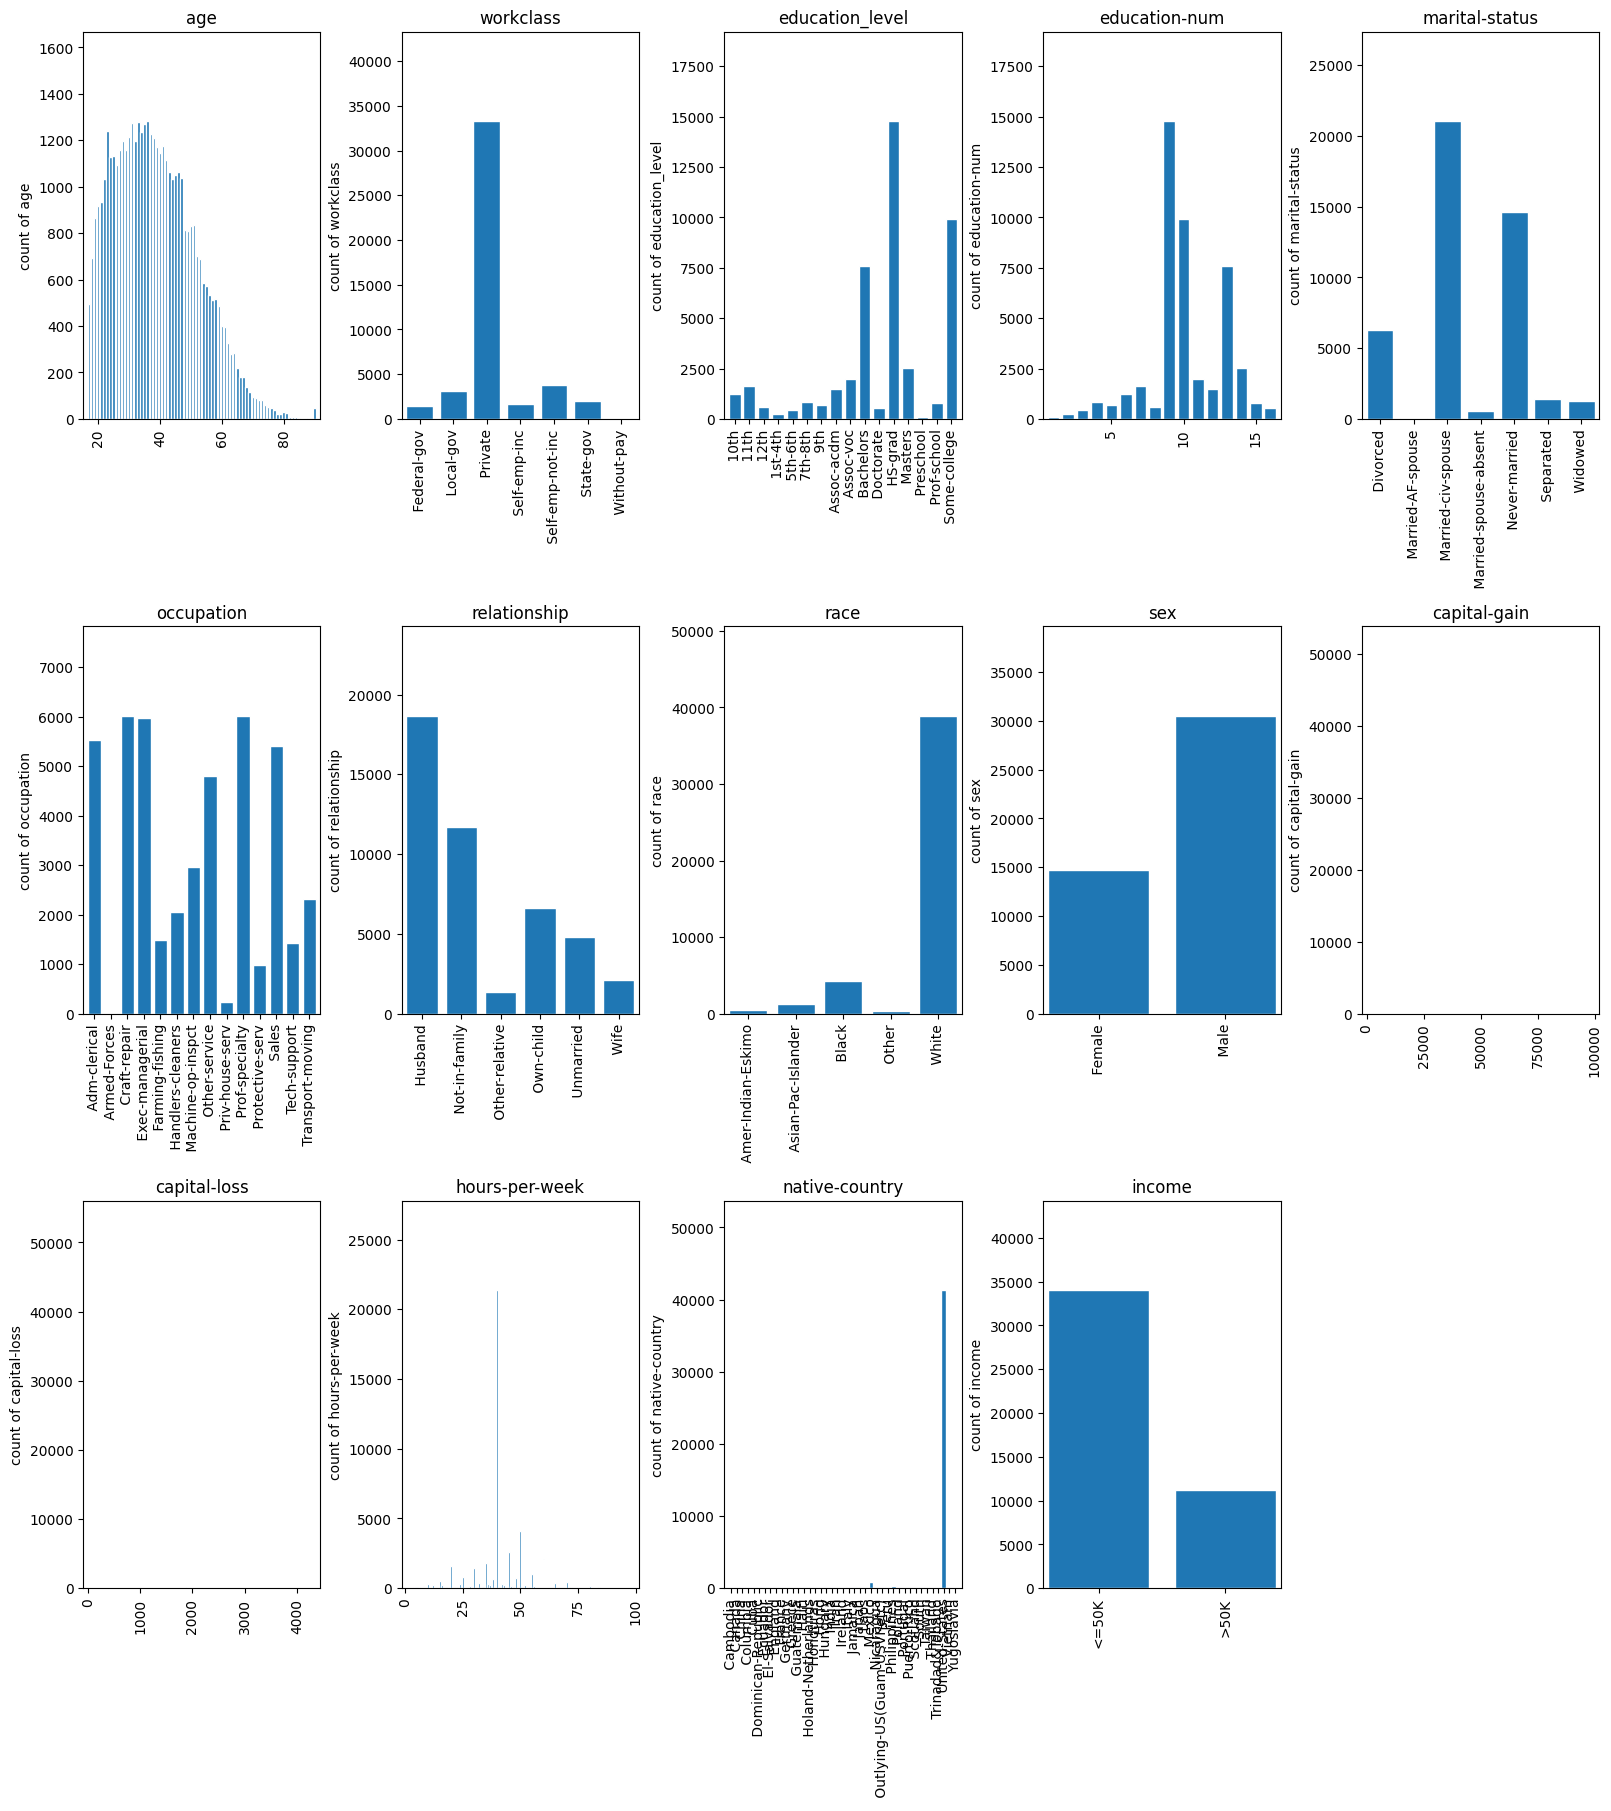

In [5]:
import matplotlib.pyplot as plt 

fig=plt.figure(figsize=(16,18),layout='constrained')

i=0
for col in data.columns:

    df_group=data.groupby([col], as_index=False ).size()
       
    i+=1
    plt.subplot(3, 5, i)
    plt.bar(x=df_group[col], height=df_group['size'], edgecolor='white')

    plt.xticks(rotation=90)
    plt.title(col)
    plt.ylabel("count of {}".format(col))
    plt.margins(x=0.02, y=0.3) 
    
plt.show()

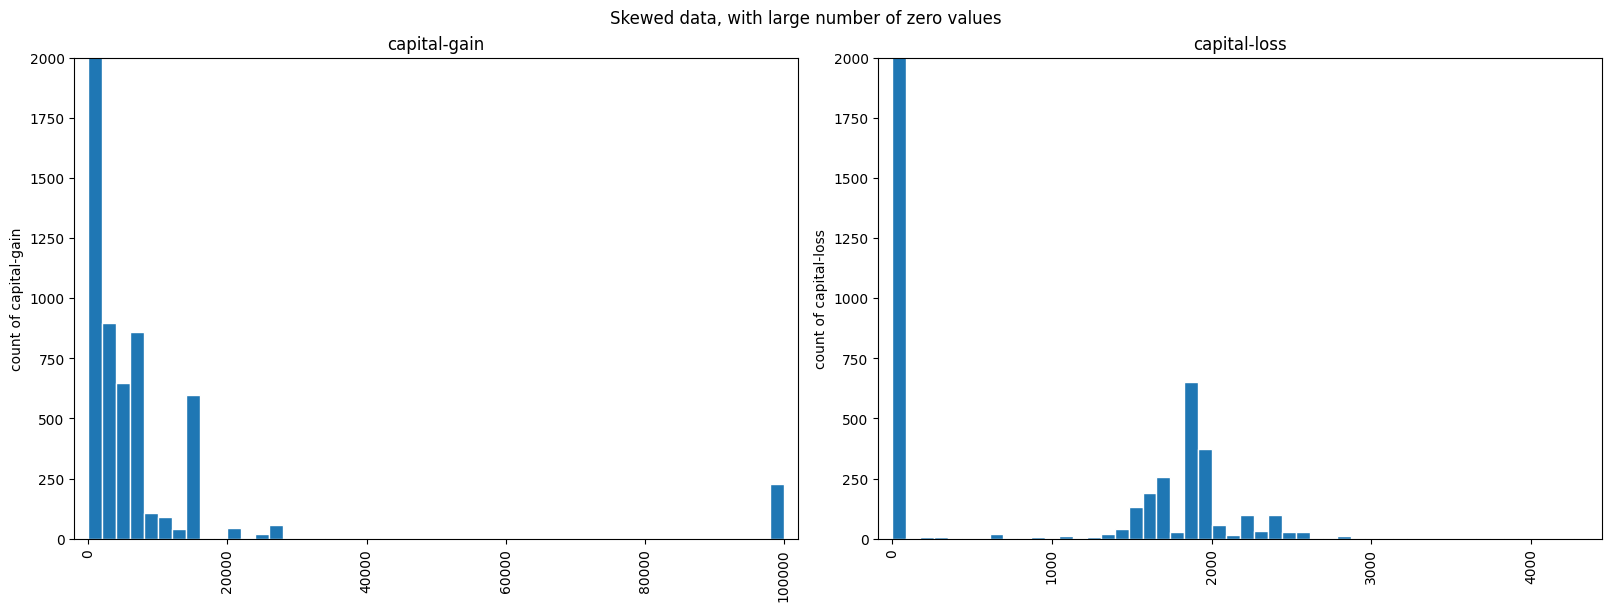

In [6]:
fig=plt.figure(figsize=(16,6),layout='constrained')

i=0
cols = ['capital-gain', 'capital-loss']
for col in cols:

    df_group=data.groupby([col], as_index=False ).size()
    
    i+=1
    plt.subplot(1, 2, i)
    plt.hist(data[col] , bins=50, edgecolor='white')
#     plt.bar(x=df_group[col][1:], height=df_group['size'][1:], edgecolor='white')
    
    plt.ylim((0, 2000))
    plt.xticks(rotation=90)
    plt.title(col)
    plt.ylabel("count of {}".format(col))
    plt.margins(x=0.02, y=0.3) 
    plt.suptitle('Skewed data, with large number of zero values')
    plt.title(col)
    
plt.show()

In [7]:
data.isin([np.inf, -np.inf]).sum()

age                0
workclass          0
education_level    0
education-num      0
marital-status     0
occupation         0
relationship       0
race               0
sex                0
capital-gain       0
capital-loss       0
hours-per-week     0
native-country     0
income             0
dtype: int64

<Figure size 1600x2100 with 0 Axes>

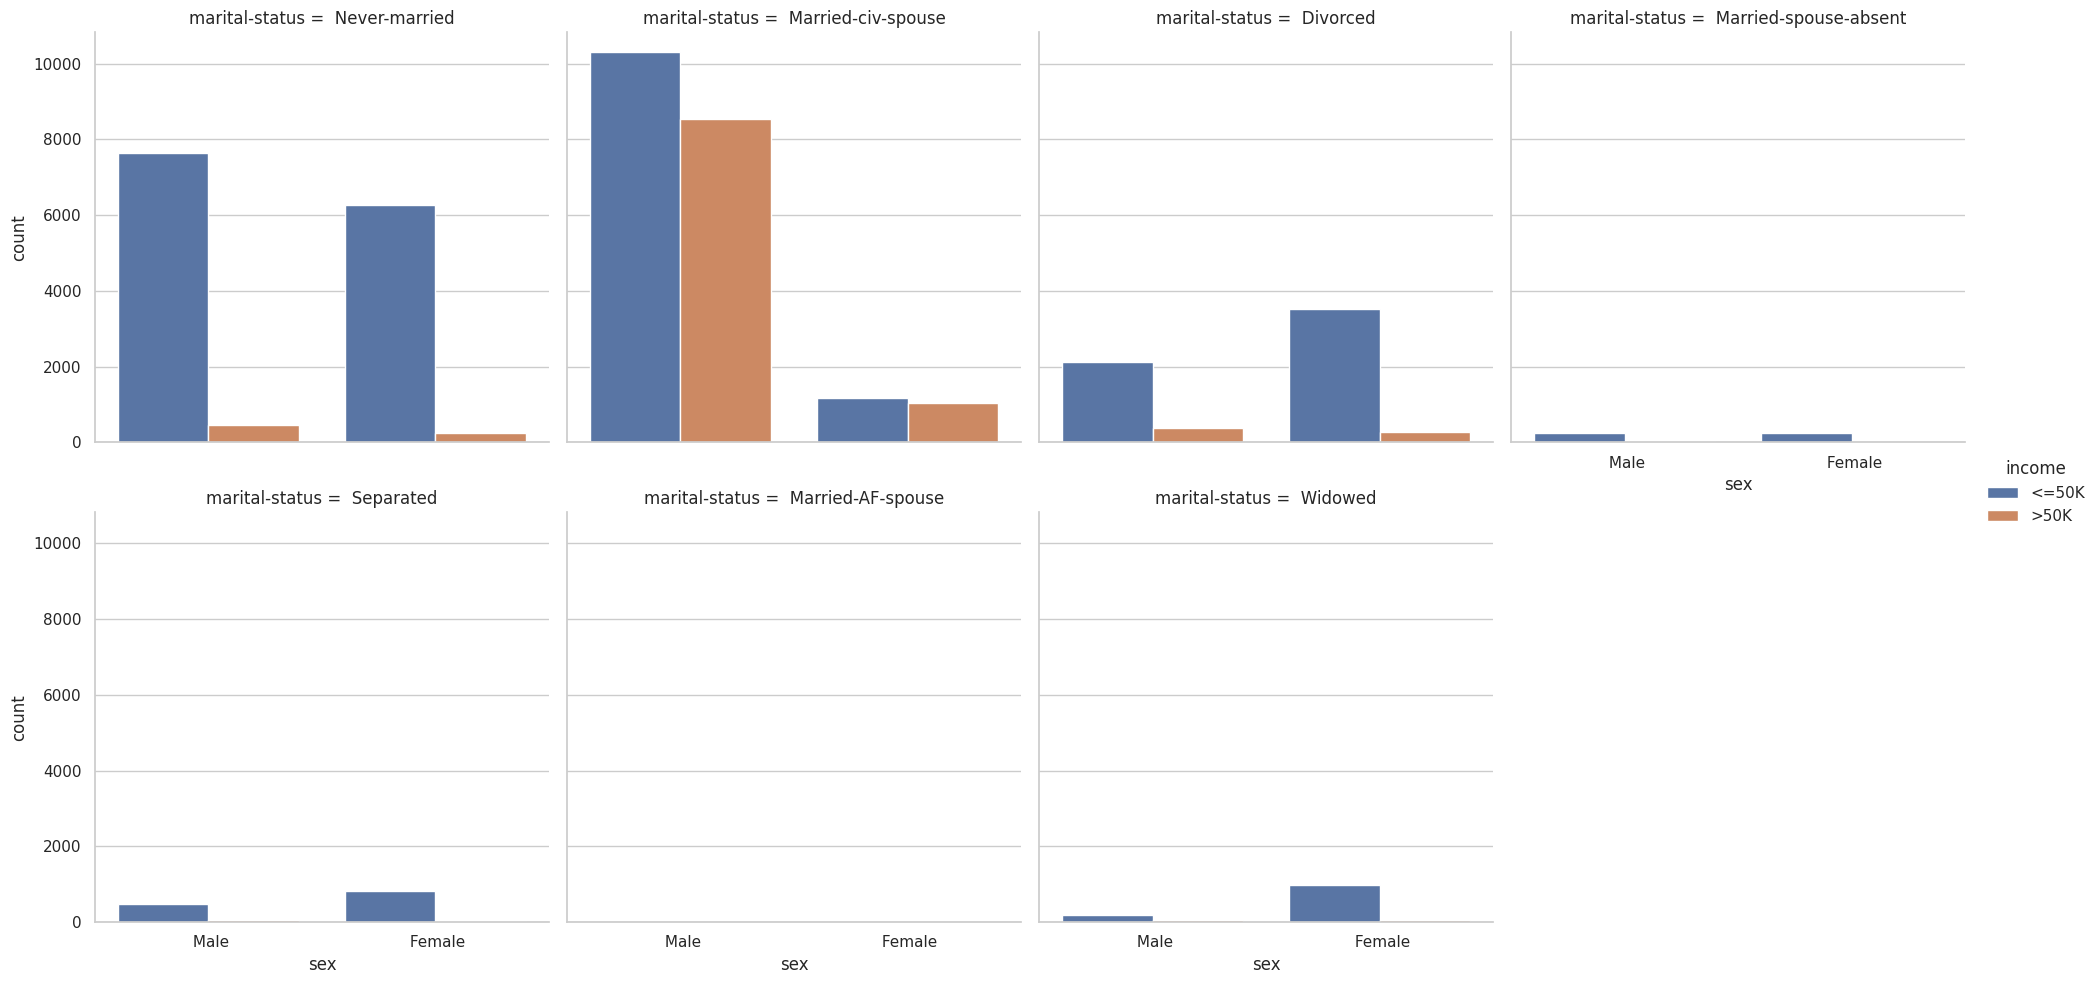

In [8]:
plt.figure(figsize = (16,21))
sns.set(style="whitegrid", color_codes=True)
sns.catplot(data= data, x='sex', col="marital-status" , hue='income', kind='count', col_wrap=4)


In [9]:
pd.DataFrame(data.groupby(['education-num','education_level'])['age'].count().reset_index().rename(columns={'age':'count'}))

,education-num,education_level,count
0,1.0,Preschool,72
1,2.0,1st-4th,222
2,3.0,5th-6th,449
3,4.0,7th-8th,823
4,5.0,9th,676
5,6.0,10th,1223
6,7.0,11th,1619
7,8.0,12th,577
8,9.0,HS-grad,14783
9,10.0,Some-college,9899


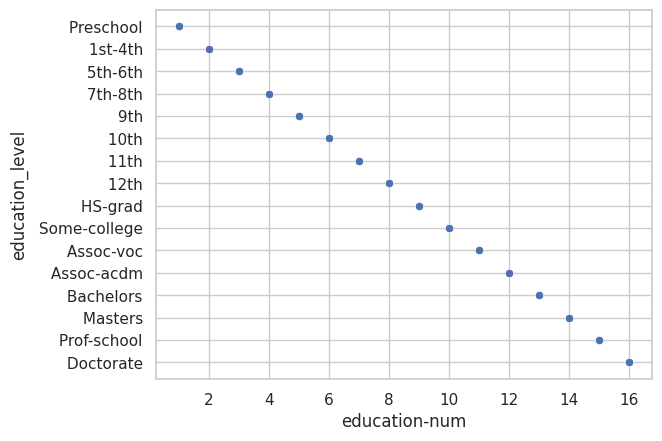

In [10]:
def plot_education(df):
    sns.scatterplot (data=df, x='education-num', y='education_level' )
    

plot_education(pd.DataFrame(data.groupby(['education-num','education_level'])['age'].count().reset_index().rename(columns={'age':'count'})))

In [11]:
# data[['education-num','education_level']].groupby(['education-num']).count()

pd.pivot_table(data=data[['education-num','education_level','age']],
               columns="education-num",
               index="education_level",
               aggfunc='count',
               margins=True,
               fill_value="")

age                                                          \
education-num   1.0  2.0  3.0  4.0  5.0   6.0   7.0  8.0    9.0  10.0  11.0   
education_level                                                               
 10th                                    1223                                 
 11th                                          1619                           
 12th                                                577                      
 1st-4th             222                                                      
 5th-6th                  449                                                 
 7th-8th                       823                                            
 9th                                676                                       
 Assoc-acdm                                                                   
 Assoc-voc                                                             1959   
 Bachelors                                                                    
 Doctorate                                                                    
 HS-grad                                                  14783               
 Masters                                                                      
 Preschool       72                                                           
 Prof-school                                                                  
 Some-college                                                    9899         
All              72  222  449  823  676  1223  1619  577  14783  9899  1959   

                                                    
education-num    12.0  13.0  14.0 15.0 16.0    All  
education_level                                     
 10th                                         1223  
 11th                                         1619  
 12th                                          577  
 1st-4th                                       222  
 5th-6th                                       449  
 7th-8th                                       823  
 9th                                           676  
 Assoc-acdm      1507                         1507  
 Assoc-voc                                    1959  
 Bachelors             7570                   7570  
 Doctorate                              544    544  
 HS-grad                                     14783  
 Masters                     2514             2514  
 Preschool                                      72  
 Prof-school                       785         785  
 Some-college                                 9899  
All              1507  7570  2514  785  544  45222

Looking at the pivot table above, it is evident that education-num and education-level are same information encoded differently. Otherwise the roww or column sum would have been different then the value in the gride. for instances, education-num (2.0) and education_level (1st-4th) has a count of 222. The row and column sum for these two is also 222, means they are directly corelated. 

The groupby was another way to look at it, and is shown above.

So, we can drop one of the two columns in proceeding with the analysis.

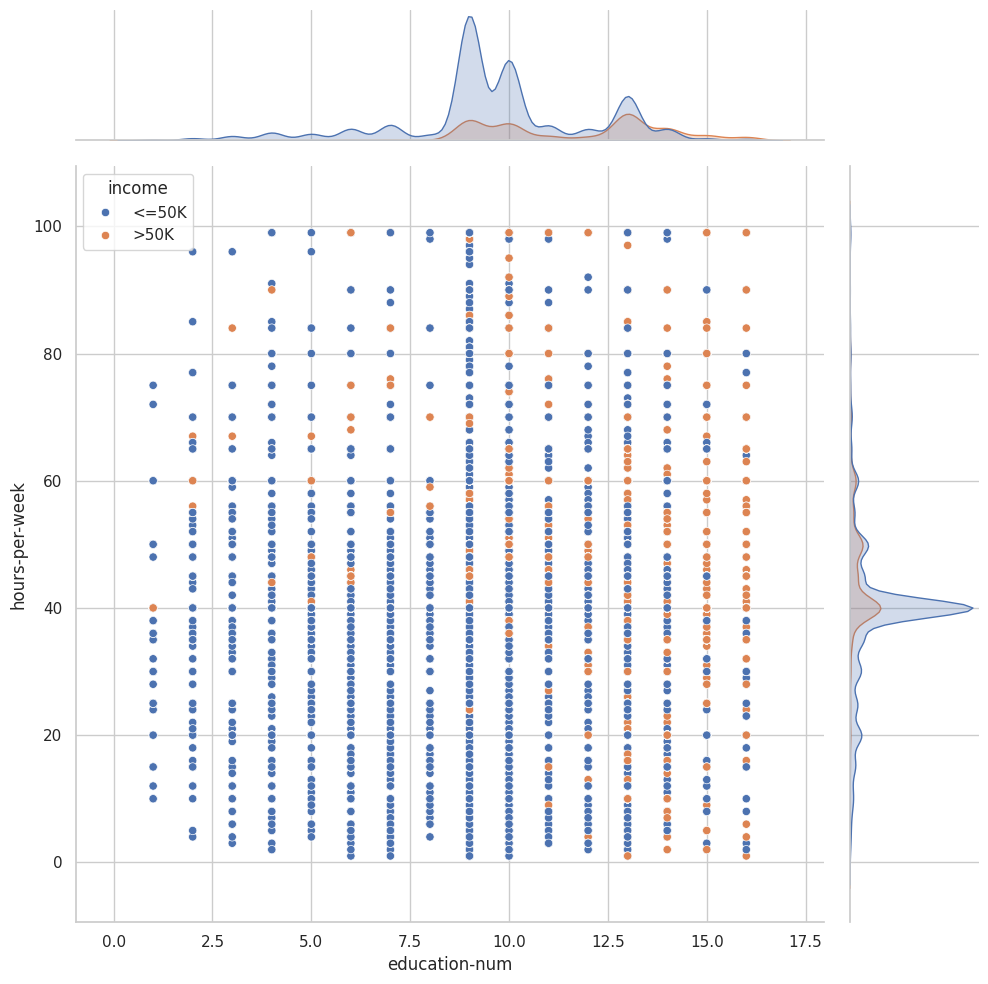

In [12]:
sns.jointplot(x="education-num", y="hours-per-week", data=data, hue='income',height= 10  );

----
## Preparing the Data
Before data can be used as input for machine learning algorithms, it often must be cleaned, formatted, and restructured — this is typically known as **preprocessing**. Fortunately, for this dataset, there are no invalid or missing entries we must deal with, however, there are some qualities about certain features that must be adjusted. This preprocessing can help tremendously with the outcome and predictive power of nearly all learning algorithms.

### Transforming Skewed Continuous Features
A dataset may sometimes contain at least one feature whose values tend to lie near a single number, but will also have a non-trivial number of vastly larger or smaller values than that single number.  Algorithms can be sensitive to such distributions of values and can underperform if the range is not properly normalized. With the census dataset two features fit this description: '`capital-gain'` and `'capital-loss'`. 

Run the code cell below to plot a histogram of these two features. Note the range of the values present and how they are distributed.

In [13]:
data.columns

Index(['age', 'workclass', 'education_level', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [14]:
#based on above exploratory analysis, we can drop the the eduction-level columns, as its 1:1 correlated with education-num.

data.drop('education_level', inplace=True, axis=1)

In [15]:
data.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'sex', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'income'],
      dtype='object')

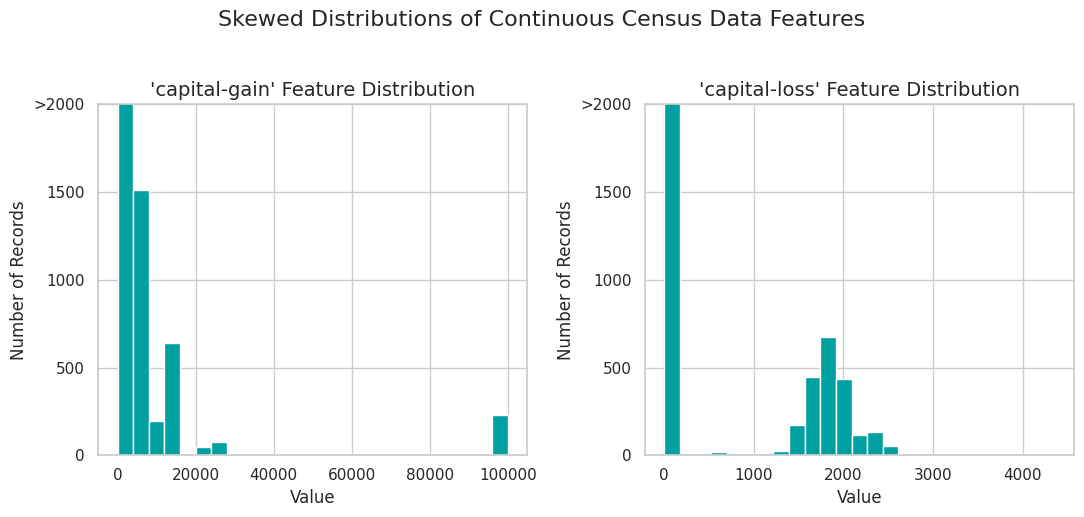

In [16]:
# Split the data into features and target label
income_raw = data['income']
features_raw = data.drop('income', axis = 1)

# Visualize skewed continuous features of original data
vs.distribution(data)

For highly-skewed feature distributions such as `'capital-gain'` and `'capital-loss'`, it is common practice to apply a <a href="https://en.wikipedia.org/wiki/Data_transformation_(statistics)">logarithmic transformation</a> on the data so that the very large and very small values do not negatively affect the performance of a learning algorithm. Using a logarithmic transformation significantly reduces the range of values caused by outliers. Care must be taken when applying this transformation however: The logarithm of `0` is undefined, so we must translate the values by a small amount above `0` to apply the the logarithm successfully.

Run the code cell below to perform a transformation on the data and visualize the results. Again, note the range of values and how they are distributed. 

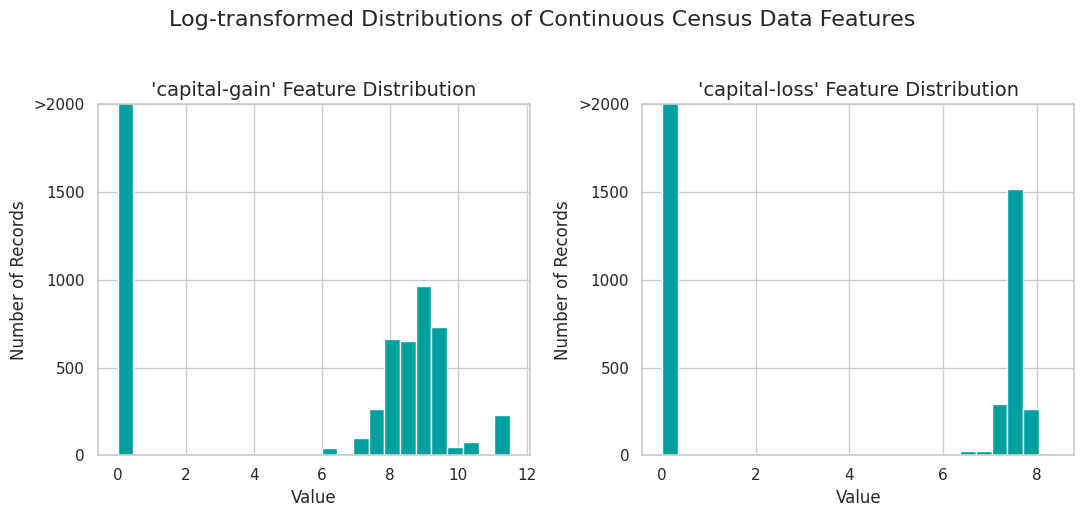

In [17]:
# Log-transform the skewed features
skewed = ['capital-gain', 'capital-loss']
features_log_transformed = pd.DataFrame(data = features_raw)
features_log_transformed[skewed] = features_raw[skewed].apply(lambda x: np.log(x + 1))

# Visualize the new log distributions
vs.distribution(features_log_transformed, transformed = True)

In [18]:
for col in skewed:
    display(features_log_transformed.groupby([col], as_index=False ).size().set_index(col).sort_values(col).T)

capital-gain,0.000000,4.744932,5.996452,6.388561,6.818924,6.899723,6.962243,6.991177,7.049255,7.068172,...,9.669788,9.824553,9.906084,10.000660,10.131619,10.136066,10.233834,10.436935,10.628884,11.512925
size,41432,8,2,42,10,4,31,5,13,2,...,8,2,44,1,4,14,56,4,3,229


capital-loss,0.000000,5.049856,5.365976,5.780744,6.040255,6.439350,6.483107,6.698268,6.781058,6.882437,...,7.847763,7.864804,7.921173,7.946264,8.008033,8.063378,8.211754,8.235095,8.268988,8.379539
size,43082,1,5,5,1,17,4,2,6,2,...,17,5,2,12,4,2,2,4,2,1


### Normalizing Numerical Features
In addition to performing transformations on features that are highly skewed, it is often good practice to perform some type of scaling on numerical features. Applying a scaling to the data does not change the shape of each feature's distribution (such as `'capital-gain'` or `'capital-loss'` above); however, normalization ensures that each feature is treated equally when applying supervised learners. Note that once scaling is applied, observing the data in its raw form will no longer have the same original meaning, as exampled below.

Run the code cell below to normalize each numerical feature. We will use [`sklearn.preprocessing.MinMaxScaler`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.MinMaxScaler.html) for this.

In [19]:
# Import sklearn.preprocessing.StandardScaler
from sklearn.preprocessing import MinMaxScaler

# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)
numerical = ['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week']

features_log_minmax_transform = pd.DataFrame(data = features_log_transformed)
features_log_minmax_transform[numerical] = scaler.fit_transform(features_log_transformed[numerical])

# Show an example of a record with scaling applied
display(features_log_minmax_transform.head(n = 5))

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country
0,0.301370,State-gov,0.800000,Never-married,Adm-clerical,Not-in-family,White,Male,0.667492,0.0,0.397959,United-States
1,0.452055,Self-emp-not-inc,0.800000,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.000000,0.0,0.122449,United-States
2,0.287671,Private,0.533333,Divorced,Handlers-cleaners,Not-in-family,White,Male,0.000000,0.0,0.397959,United-States
3,0.493151,Private,0.400000,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0.000000,0.0,0.397959,United-States
4,0.150685,Private,0.800000,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0.000000,0.0,0.397959,Cuba


In [20]:
for col in numerical:
    display(features_log_minmax_transform.groupby([col], as_index=False ).size().set_index(col).sort_values(col).T)

age,0.000000,0.013699,0.027397,0.041096,0.054795,0.068493,0.082192,0.095890,0.109589,0.123288,...,0.876712,0.890411,0.904110,0.917808,0.931507,0.945205,0.958904,0.972603,0.986301,1.000000
size,493,695,864,916,935,1034,1241,1130,1133,1092,...,27,10,9,9,5,1,1,5,1,46


education-num,0.000000,0.066667,0.133333,0.200000,0.266667,0.333333,0.400000,0.466667,0.533333,0.600000,0.666667,0.733333,0.800000,0.866667,0.933333,1.000000
size,72,222,449,823,676,1223,1619,577,14783,9899,1959,1507,7570,2514,785,544


capital-gain,0.000000,0.412140,0.520845,0.554903,0.592284,0.599302,0.604733,0.607246,0.612290,0.613934,...,0.839907,0.853350,0.860432,0.868646,0.880021,0.880408,0.888900,0.906541,0.923213,1.000000
size,41432,8,2,42,10,4,31,5,13,2,...,8,2,44,1,4,14,56,4,3,229


capital-loss,0.000000,0.602641,0.640366,0.689864,0.720834,0.768461,0.773683,0.799360,0.809240,0.821338,...,0.936539,0.938572,0.945299,0.948294,0.955665,0.962270,0.979977,0.982762,0.986807,1.000000
size,43082,1,5,5,1,17,4,2,6,2,...,17,5,2,12,4,2,2,4,2,1


hours-per-week,0.000000,0.010204,0.020408,0.030612,0.040816,0.051020,0.061224,0.071429,0.081633,0.091837,...,0.897959,0.908163,0.918367,0.928571,0.948980,0.959184,0.969388,0.979592,0.989796,1.000000
size,12,24,35,47,60,59,32,152,24,332,...,3,41,3,3,1,2,9,2,14,123


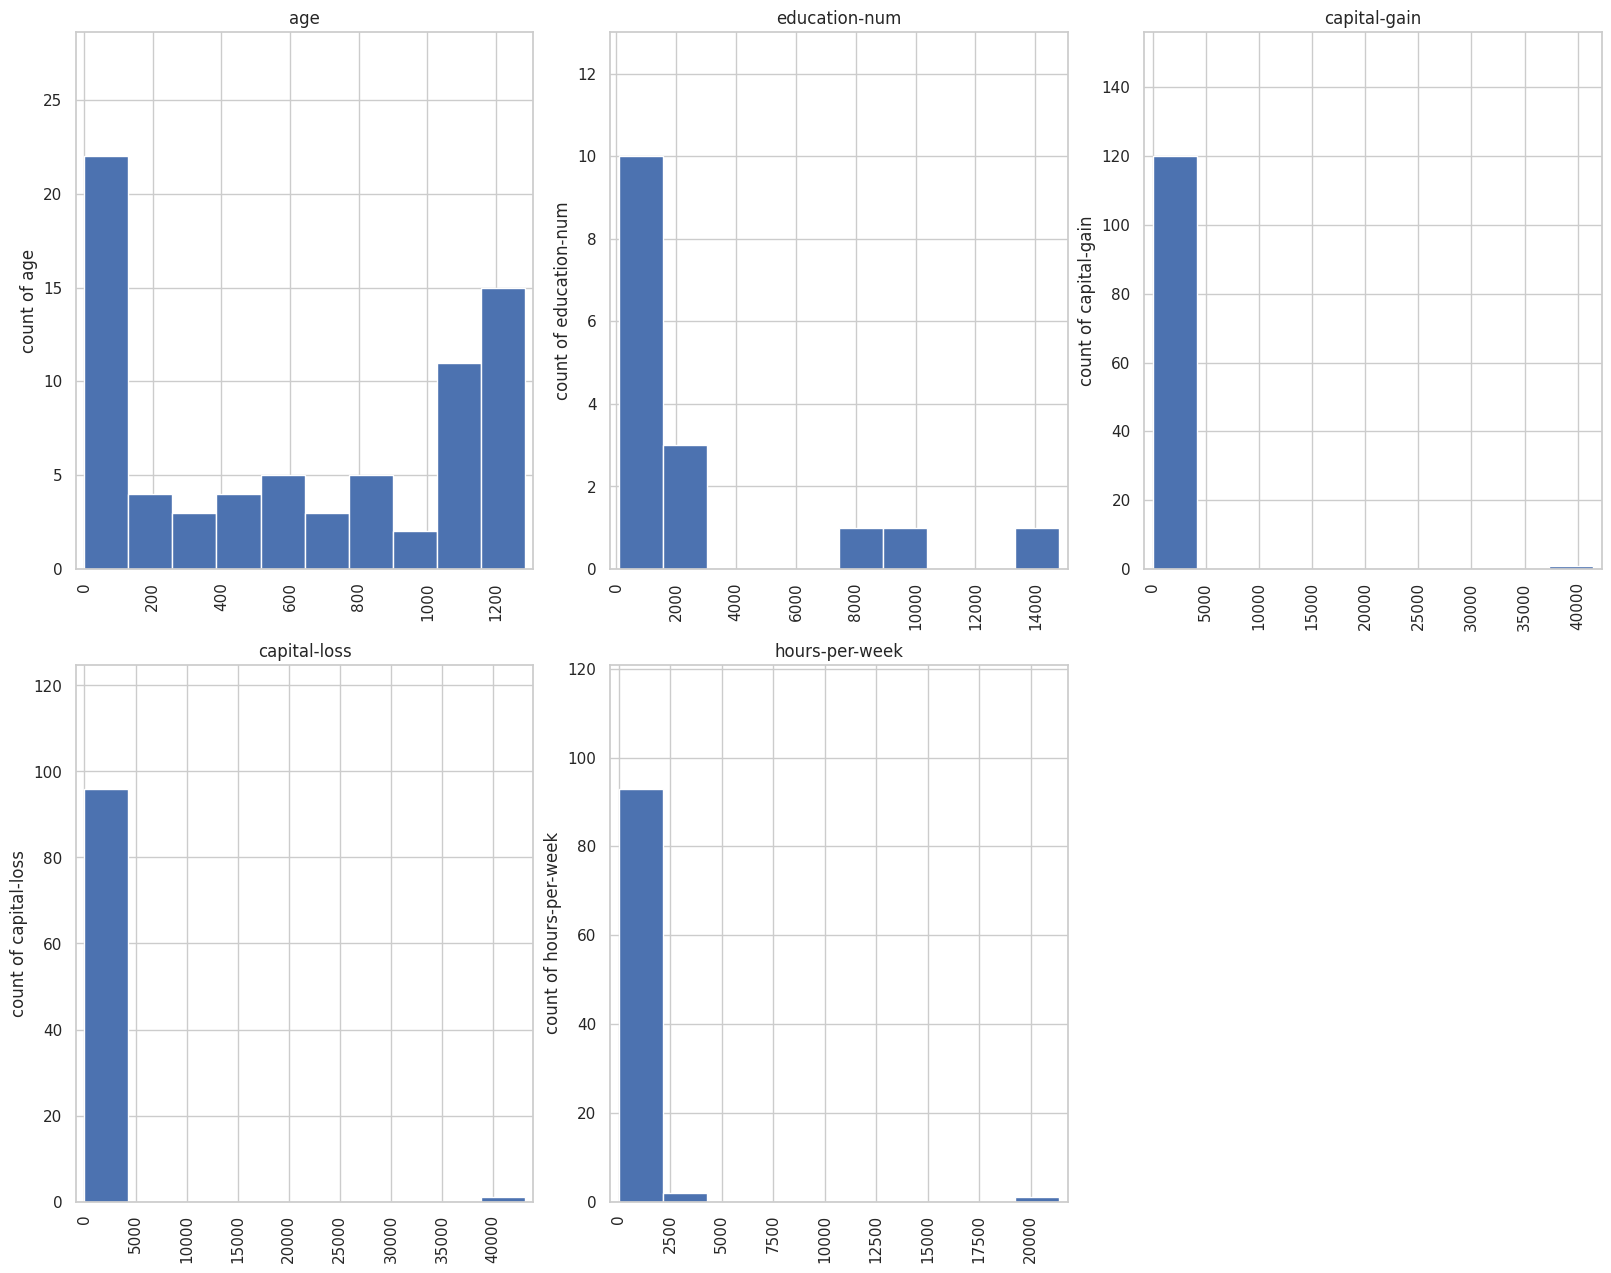

In [21]:
fig=plt.figure(figsize=(16,18),layout='constrained')

i=0
for col in numerical:

#     df_group=features_log_minmax_transform.groupby([col], as_index=False ).size()
    df_group=features_log_minmax_transform.groupby([col], as_index=False ).size().set_index(col).sort_values(col)
       
    i+=1
    plt.subplot(3, 3, i)
#     plt.bar(x=df_group[col], height=df_group['size'], edgecolor='white')
    plt.hist(df_group, edgecolor='white')
    plt.xticks(rotation=90)
    plt.title(col)
    plt.ylabel("count of {}".format(col))
    plt.margins(x=0.02, y=0.3) 
    
plt.show()

### Implementation: Data Preprocessing

From the table in **Exploring the Data** above, we can see there are several features for each record that are non-numeric. Typically, learning algorithms expect input to be numeric, which requires that non-numeric features (called *categorical variables*) be converted. One popular way to convert categorical variables is by using the **one-hot encoding** scheme. One-hot encoding creates a _"dummy"_ variable for each possible category of each non-numeric feature. For example, assume `someFeature` has three possible entries: `A`, `B`, or `C`:

|   | someFeature |                    
| :-: | :-: |                            
| 0 |  B  |  
| 1 |  C  |
| 2 |  A  |  

We then encode this feature into `someFeature_A`, `someFeature_B` and `someFeature_C`:

|| someFeature_A | someFeature_B | someFeature_C |
| :-: | :-: | :-: | :-: |
|0| 0 | 1 | 0 |
|1| 0 | 0 | 1 |
|2| 1 | 0 | 0 |

Additionally, as with the non-numeric features, we need to convert the non-numeric target label, `'income'` to numerical values for the learning algorithm to work. Since there are only two possible categories for this label ("<=50K" and ">50K"), we can avoid using one-hot encoding and simply encode these two categories as `0` and `1`, respectively. In code cell below, you will need to implement the following:
 - Use [`pandas.get_dummies()`](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html?highlight=get_dummies#pandas.get_dummies) to perform one-hot encoding on the `'features_log_minmax_transform'` data.
 - Convert the target label `'income_raw'` to numerical entries.
   - Set records with "<=50K" to `0` and records with ">50K" to `1`.

In [22]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features_log_minmax_transform)

# TODO: Encode the 'income_raw' data to numerical values
# income = np.where (income_raw  == '<=50K',0, 1)
income = (income_raw == ">50K").astype(np.uint8)

# Print the number of features after one-hot encoding
encoded = list(features_final.columns)
print("{} total features after one-hot encoding.".format(len(encoded)))

# Uncomment the following line to see the encoded feature names
print(encoded)

87 total features after one-hot encoding.
['age', 'education-num', 'capital-gain', 'capital-loss', 'hours-per-week', 'workclass_ Federal-gov', 'workclass_ Local-gov', 'workclass_ Private', 'workclass_ Self-emp-inc', 'workclass_ Self-emp-not-inc', 'workclass_ State-gov', 'workclass_ Without-pay', 'marital-status_ Divorced', 'marital-status_ Married-AF-spouse', 'marital-status_ Married-civ-spouse', 'marital-status_ Married-spouse-absent', 'marital-status_ Never-married', 'marital-status_ Separated', 'marital-status_ Widowed', 'occupation_ Adm-clerical', 'occupation_ Armed-Forces', 'occupation_ Craft-repair', 'occupation_ Exec-managerial', 'occupation_ Farming-fishing', 'occupation_ Handlers-cleaners', 'occupation_ Machine-op-inspct', 'occupation_ Other-service', 'occupation_ Priv-house-serv', 'occupation_ Prof-specialty', 'occupation_ Protective-serv', 'occupation_ Sales', 'occupation_ Tech-support', 'occupation_ Transport-moving', 'relationship_ Husband', 'relationship_ Not-in-family', 

### Shuffle and Split Data
Now all _categorical variables_ have been converted into numerical features, and all numerical features have been normalized. As always, we will now split the data (both features and their labels) into training and test sets. 80% of the data will be used for training and 20% for testing.

Run the code cell below to perform this split.

In [23]:
# Import train_test_split
from sklearn.model_selection import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    income, 
                                                    test_size = 0.2, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 36177 samples.
Testing set has 9045 samples.


----
## Evaluating Model Performance
In this section, we will investigate four different algorithms, and determine which is best at modeling the data. Three of these algorithms will be supervised learners of your choice, and the fourth algorithm is known as a *naive predictor*.

### Metrics and the Naive Predictor
*CharityML*, equipped with their research, knows individuals that make more than \$50,000 are most likely to donate to their charity. Because of this, *CharityML* is particularly interested in predicting who makes more than \$50,000 accurately. It would seem that using **accuracy** as a metric for evaluating a particular model's performace would be appropriate. Additionally, identifying someone that *does not* make more than \$50,000 as someone who does would be detrimental to *CharityML*, since they are looking to find individuals willing to donate. Therefore, a model's ability to precisely predict those that make more than \$50,000 is *more important* than the model's ability to **recall** those individuals. We can use **F-beta score** as a metric that considers both precision and recall:

$$ F_{\beta} = (1 + \beta^2) \cdot \frac{precision \cdot recall}{\left( \beta^2 \cdot precision \right) + recall} $$

In particular, when $\beta = 0.5$, more emphasis is placed on precision. This is called the **F$_{0.5}$ score** (or F-score for simplicity).

Looking at the distribution of classes (those who make at most \$50,000, and those who make more), it's clear most individuals do not make more than \$50,000. This can greatly affect **accuracy**, since we could simply say *"this person does not make more than \$50,000"* and generally be right, without ever looking at the data! Making such a statement would be called **naive**, since we have not considered any information to substantiate the claim. It is always important to consider the *naive prediction* for your data, to help establish a benchmark for whether a model is performing well. That been said, using that prediction would be pointless: If we predicted all people made less than \$50,000, *CharityML* would identify no one as donors. 


#### Note: Recap of accuracy, precision, recall

**Accuracy** measures how often the classifier makes the correct prediction. It’s the ratio of the number of correct predictions to the total number of predictions (the number of test data points).

**Precision** tells us what proportion of messages we classified as spam, actually were spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all positives(all words classified as spam, irrespective of whether that was the correct classificatio), in other words it is the ratio of

`[True Positives/(True Positives + False Positives)]`

**Recall(sensitivity)** tells us what proportion of messages that actually were spam were classified by us as spam.
It is a ratio of true positives(words classified as spam, and which are actually spam) to all the words that were actually spam, in other words it is the ratio of

`[True Positives/(True Positives + False Negatives)]`

For classification problems that are skewed in their classification distributions like in our case, for example if we had a 100 text messages and only 2 were spam and the rest 98 weren't, accuracy by itself is not a very good metric. We could classify 90 messages as not spam(including the 2 that were spam but we classify them as not spam, hence they would be false negatives) and 10 as spam(all 10 false positives) and still get a reasonably good accuracy score. For such cases, precision and recall come in very handy. These two metrics can be combined to get the F1 score, which is weighted average(harmonic mean) of the precision and recall scores. This score can range from 0 to 1, with 1 being the best possible F1 score(we take the harmonic mean as we are dealing with ratios).

### Question 1 - Naive Predictor Performace
* If we chose a model that always predicted an individual made more than $50,000, what would  that model's accuracy and F-score be on this dataset? You must use the code cell below and assign your results to `'accuracy'` and `'fscore'` to be used later.

**Please note** that the the purpose of generating a naive predictor is simply to show what a base model without any intelligence would look like. In the real world, ideally your base model would be either the results of a previous model or could be based on a research paper upon which you are looking to improve. When there is no benchmark model set, getting a result better than random choice is a place you could start from.

**HINT:** 

* When we have a model that always predicts '1' (i.e. the individual makes more than 50k) then our model will have no True Negatives(TN) or False Negatives(FN) as we are not making any negative('0' value) predictions. Therefore our Accuracy in this case becomes the same as our Precision (True Positives / (True Positives + False Positives)) as every prediction that we have made with value '1' that should have '0' becomes a False Positive; therefore our denominator in this case is the total number of records we have in total. 
* Our Recall score (True Positives / (True Positives + False Negatives)) in this setting becomes 1 as we have no False Negatives.

In [24]:
TP = np.sum(income )  # Counting the ones as this is the naive case. Note that 'income' is the 'income_raw' data encoded to numerical values done in the data preprocessing step.
FP = income.count() - TP # Specific to the naive case

TN = 0 # No predicted negatives in the naive case
FN = 0 # No predicted negatives in the naive case

# TODO: Calculate accuracy, precision and recall
accuracy = (TP + TN) / (TP + FP + TN + FN)
recall = TP / (TP + FN)
precision = TP / (TP + FP)

# TODO: Calculate F-score using the formula above for beta = 0.5 and correct values for precision and recall.
beta=0.5
beta_square = 0.5 ** 2
fscore = ( ( (1 + beta_square) * recall * precision) / ( ( beta_square * precision) + recall) )

# Print the results 
print("Naive Predictor: [Accuracy score: {:.4f}, F-score: {:.4f}]".format(accuracy, fscore))

Naive Predictor: [Accuracy score: 0.2478, F-score: 0.2917]


###  Supervised Learning Models
**The following are some of the supervised learning models that are currently available in** [`scikit-learn`](http://scikit-learn.org/stable/supervised_learning.html) **that you may choose from:**
- Gaussian Naive Bayes (GaussianNB)
- Decision Trees
- Ensemble Methods (Bagging, AdaBoost, Random Forest, Gradient Boosting)
- K-Nearest Neighbors (KNeighbors)
- Stochastic Gradient Descent Classifier (SGDC)
- Support Vector Machines (SVM)
- Logistic Regression

### Question 2 - Model Application
List three of the supervised learning models above that are appropriate for this problem that you will test on the census data. For each model chosen

- Describe one real-world application in industry where the model can be applied. 
- What are the strengths of the model; when does it perform well?
- What are the weaknesses of the model; when does it perform poorly?
- What makes this model a good candidate for the problem, given what you know about the data?

**HINT:**

Structure your answer in the same format as above^, with 4 parts for each of the three models you pick. Please include references with your answer.

**Answer:**

### GaussianNB
> It originates from Bayes Theorem and uses the conditional independence rule, which assumes that attributes are independent of each other in classification. [1]

> #### Real-world application in industry where it can be applied
   
        - Text classification, Medical Daignosis, Credit Scoring, Recommendation systems, Anomaly Detection, 
        - Predictive Maintenance, Face Recognition, Biometric Authentication [3]

> #### Model Strength [1]
        - Simple, Fast and flexible model gives highly reliable results
        - Works well with Large Datasets
        - Doesn't require too much testing
        - Provides better grading performance by eliminating insignificant specifications

> #### Model Weakness
        - Large datasets required to achieve a good result [1]
        - Shows lower performance than the other classifiers according to the type of the problem [1]
        - Independence Assumption: The assumption of feature independence may not hold true in real-world data, impacting the model’s performance. [3]
        - Sensitivity to Outliers: Outliers can skew the mean and variance calculations, affecting the classification results.[3]
        - Performance on Imbalanced Datasets: The algorithm may struggle with imbalanced data, where one class significantly outnumbers the others. [3]

> #### Why its a good candidate for this problem
        - our data set is ** NOT ** a text classification, so it may not a great candidate



### RandomForestClassifier [1]
> It is a simple algorithm. It is also a preferred decision tree algorithm, as it doesnot overfit within a single decision tree. During training, it creates many decision trees from subset of the data-columns and makes the prediction. Classification is made by selecting the majority votes.

> #### Real-world application in industry where it can be applied [2]
        - In finance, evaluating customers with high credit risk, detecting fraudulent activities, 
        - solving complex financial calculations.
        - The healthcare sector  computational biology, medical data analysis for understanding genes, and 
        - model building by using diseases and biological data, 
        - gene expression classification, biomarker discovery, and sequence annotation. 
        - Customer behavior and recommendation

> #### Model Strength [1]
        - Reduces the chance of encountering a classifier that does not perform well due to the relationship between training and testing data
        - Extermely flexible and have a very high accuracy.
        - Maintains accuracy even when a large proportion of the data is missing 

> #### Model Weakness
        - Difficult to understand and interpret visually
        - Much hard and time consuming to construct than decision tree
        - Requres a lot of computation and algorithm itself is less heuristic

> #### Why its a good candidate for this problem
        -




### LogisticRegression [1]
> Logistic regression is a machine learning method used in the classification problem when you need to distinguish one class from another. The simplest case is a binary classification [4]
> #### Real-world application in industry where it can be applied\
        - Credit scoring, mdicine, Text editing, 
        - hotel boking (Booking.com has a lot of machine learning methods literally everywhere on the site. They try to predict users' intentions and recognize entities)
        - Gaming
        
> #### Model Strength
        - Has a low variance
        - provides probablities for output
        - Easy to apply and does not spend much time to train
        - Allows a cross validation at each iteration of the process because of that it optimizes the number of iterations

> #### Model Weakness
        - Cannot naturally classify multi-class data but can be adapted to multi-class classification with various applications
        - Does not work well when there are correlated attributes

> #### Why its a good candidate for this problem
        - It is potentially a good model, as our target output is binary


### SGDClassifier
> is a simple yet very efficient approach to fitting linear classifiers and regressors under convex loss functions such as (linear) Support Vector Machines and Logistic Regression. 

> #### Real-world application in industry where it can be applied
        - SGD has been successfully applied to large-scale and sparse machine learning problems often encountered in text classification and natural language processing

> #### Model Strength
        - Efficiency.
        - Ease of implementation (lots of opportunities for code tuning).

> #### Model Weakness
        - SGD requires a number of hyperparameters such as the regularization parameter and the number of iterations.
        - SGD is sensitive to feature scaling.
        
> #### Why its a good candidate for this problem
        - It can be suitable as our dataset is sparse due to the categorical data with large range of unique values



### LinearSVC [1]
> SVM is a classification algorightm based on statistical learning threory. It can be used for multiclass and non-linear data.

> #### Real-world application in industry where it can be applied
        - heart diseases [1]

> #### Model Strength [1]
        - Gives good results even if there is not enough information about the data. Also works well with unstructured data.
        - Solves complex problems with a convenient kernel solution function.
        - Relatively good scaling of high-dimensional data

> #### Model Weakness [1]
        - It is difficult to choose the appropriate kernel solution function.
        - Training time is long when using large data sets.
        - It may be difficult to interpret and understand because of problems caused by personal factors and the weights of variables.
        - The weights of the variables are not constant, thus the contribution of each variable to the output is variant.

> #### Why its a good candidate for this problem


### KNeighborsClassifier
> It is the simplest of the classification algorithms. The algorithm takes advantage of previously classified data. Attribute vectors must be created to implement the algorithm. The k parameter in this algorithm specifies the number of neighborhoods. According to the specified k parameter, each data is assigned to the nearest neighbor [1]
> It's a distance based algorithm, i.e., measures the proxmity of the features with other feature in neighborhood

> ####  Real-world application in industry where it can be applied
> ####  Model Strength
        - Easy to implement and understand because it does not include any assumptions. It is also heuristic
        - Responds quickly to changes in input during real-time usages
        - can be easily applied to multi-class classification problem

> #### Model Weakness
        - As the data set grows, the speed of the algorithm decreases. 
        - It becomes difficult to reach the ouput when the number of variables increases
        - Not capable of dealing with missing values and it is affected by outliers
        - To work properly the variable features must be expressed in the same scale
> #### Why its a good candidate for this problem


### AdaBoostClassifier
> Adaboost algorithm, short for Adaptive Boosting, is a boosting algorithm and works by iteratively training weak learners, such as decision trees or linear models, on a dataset and assigning weights to each training instance based on its classification error.

> #### Real-world application in industry where it can be applied
        - computer vision, natural language processing, and fraud detection
        
> #### Model Strength
        - Scalability: handle complex data, feature extraction
        - Robustness: prevent overfitting by using a weighted combination of weak learners
        - Improved Classification Accuracy
        - Versatility
        - Speed: Adaboost is a relatively fast and efficient algorithm. 
        
> #### Model Weakness
        - Sensitivity to Noisy data
        - complexity of implementation
        - Computational cost
        - bias toward certain features
        - lack of transparency
        - vulnerability to outliers

> #### Why its a good candidate for this problem
        - it is a suitable suit for our dataset


### BaggingClassifier [7]
> In bagging, weak learners are trained in parallel, but in boosting, they learn sequentially. This means that a series of models is constructed and with each new model iteration, the weights of the misclassified data in the previous model are increased. Bagging methods are typically used on weak learners that exhibit high variance and low bias, whereas boosting methods are used when low variance and high bias are observed.


> #### Real-world application in industry where it can be applied
        - heatlhcase: used to form medical data predictions
        - IT: precision and accuracy in IT systems, such as ones network intrusion detection systems.
        - Environment: Remote sensing
        - Finance: automating critical tasks, fraud detection, credit risk evaluations and option pricing problems

> #### Model Strength
        - Ease of implementation
        - Reduction of variance

> ####  Model Weakness
        - Loss of interpretability
        - Computationally expensive
        - Less flexible
        
> #### Why its a good candidate for this problem
        - it can be a choice 



### GradientBoostingClassifier 
> its an emsemble model, as its generated optimizing other model (decision tree or weak learner)
> The Gradient Boosting machine learning algorithm sequentially adds weak learners to form a strong predictive model. The process involves three key elements: [2]
    - A loss function to be optimized.
    - A weak learner to make predictions.
    - An additive model to minimize the loss function.
    - It's a learning method that makes prdictions by combining outputs from trees. It build trees by reducing erros from previous trees. As tree is added to the model, the model become more reliable

> ####  Real-world application in industry where it can be applied [2]
        - powers personalized recommendations in retail and ecommerce, 
        - streamlines inventory management, and aids in fraud detection. 
        - credit risk assessment, churn prediction, and algorithmic trading.
        - healthcare and medicine applications, assisting medical professionals in disease diagnosis, drug discovery, and personalized medicine.
        - Search and online advertising use Gradient Boosting for search ranking, ad targeting, and click-through rate prediction, enhancing user experience and business outcomes.

> ####  Model Strength [1]
        - Makes easier to use custom fuctions because it provides optimization through functions rather than parameters
        - Since it is a step-by-step algorithm, it can give good results in large and very different datasets

> ####  Model Weakness [1]
        - Training takes a long time because the trees are built sequentially
        - If the data is noisy, errors occur when estimating or classifying

> ####  Why its a good candidate for this problem
        - its a candidate for our problem at hand


### References
[1] https://www.researchgate.net/publication/338950098_Comparison_of_Multi-class_Classification_Algorithms_on_Early_Diagnosis_of_Heart_Diseases

[2] https://www.spiceworks.com/tech/artificial-intelligence/articles/xgboost-vs-random-forest-vs-gradient-boosting/

[3] https://medium.com/@kashishdafe0410/gaussian-naive-bayes-understanding-the-basics-and-applications-52098087b963

[4] https://activewizards.com/blog/5-real-world-examples-of-logistic-regression-application

[5] https://scikit-learn.org/1.5/modules/sgd.html

[6] https://dataaspirant.com/adaboost-algorithm/#t-1679246769717

[7] https://www.ibm.com/topics/bagging






### Implementation - Creating a Training and Predicting Pipeline
To properly evaluate the performance of each model you've chosen, it's important that you create a training and predicting pipeline that allows you to quickly and effectively train models using various sizes of training data and perform predictions on the testing data. Your implementation here will be used in the following section.
In the code block below, you will need to implement the following:
 - Import `fbeta_score` and `accuracy_score` from [`sklearn.metrics`](http://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics).
 - Fit the learner to the sampled training data and record the training time.
 - Perform predictions on the test data `X_test`, and also on the first 300 training points `X_train[:300]`.
   - Record the total prediction time.
 - Calculate the accuracy score for both the training subset and testing set.
 - Calculate the F-score for both the training subset and testing set.
   - Make sure that you set the `beta` parameter!

In [25]:
# TODO: Import two metrics from sklearn - fbeta_score and accuracy_score

from sklearn.metrics import fbeta_score, accuracy_score

def train_predict(learner, sample_size, X_train, y_train, X_test, y_test): 
    '''
    inputs:
       - learner: the learning algorithm to be trained and predicted on
       - sample_size: the size of samples (number) to be drawn from training set
       - X_train: features training set
       - y_train: income training set
       - X_test: features testing set
       - y_test: income testing set
    '''
    
    results = {}
    subset  = 300
    beta    = 0.5
    
    # TODO: Fit the learner to the training data using slicing with 'sample_size' using .fit(training_features[:], training_labels[:])
    start = time() # Get start time
    learner = learner.fit(X_train[:sample_size], y_train[:sample_size])
    end = time() # Get end time
    
    # TODO: Calculate the training time
    results['train_time'] = end - start
        
    # TODO: Get the predictions on the test set(X_test),
    #       then get predictions on the first 300 training samples(X_train) using .predict()
    start = time() # Get start time
    predictions_test  = learner.predict(X_test)
    predictions_train = learner.predict(X_train[:subset])
    end = time() # Get end time
    
    # TODO: Calculate the total prediction time
    results['pred_time'] = end - start
            
    # TODO: Compute accuracy on the first 300 training samples which is y_train[:300]
    results['acc_train'] = accuracy_score(y_train[:subset], predictions_train)
        
    # TODO: Compute accuracy on test set using accuracy_score()
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    # TODO: Compute F-score on the the first 300 training samples using fbeta_score()
    results['f_train'] = fbeta_score(y_true = y_train[:subset], 
                                     y_pred = predictions_train,
                                     beta   = beta)
        
    # TODO: Compute F-score on the test set which is y_test
    results['f_test'] = fbeta_score(y_true = y_test, 
                                    y_pred = predictions_test,
                                    beta   = beta)
       
    # Success
    print("{} trained on {} samples.".format(learner.__class__.__name__, sample_size))
        
    # Return the results
    return results

### Implementation: Initial Model Evaluation
In the code cell, you will need to implement the following:
- Import the three supervised learning models you've discussed in the previous section.
- Initialize the three models and store them in `'clf_A'`, `'clf_B'`, and `'clf_C'`.
  - Use a `'random_state'` for each model you use, if provided.
  - **Note:** Use the default settings for each model — you will tune one specific model in a later section.
- Calculate the number of records equal to 1%, 10%, and 100% of the training data.
  - Store those values in `'samples_1'`, `'samples_10'`, and `'samples_100'` respectively.

**Note:** Depending on which algorithms you chose, the following implementation may take some time to run!

GaussianNB trained on 361 samples.
GaussianNB trained on 3617 samples.
GaussianNB trained on 36177 samples.
RandomForestClassifier trained on 361 samples.
RandomForestClassifier trained on 3617 samples.
RandomForestClassifier trained on 36177 samples.
LogisticRegression trained on 361 samples.
LogisticRegression trained on 3617 samples.
LogisticRegression trained on 36177 samples.


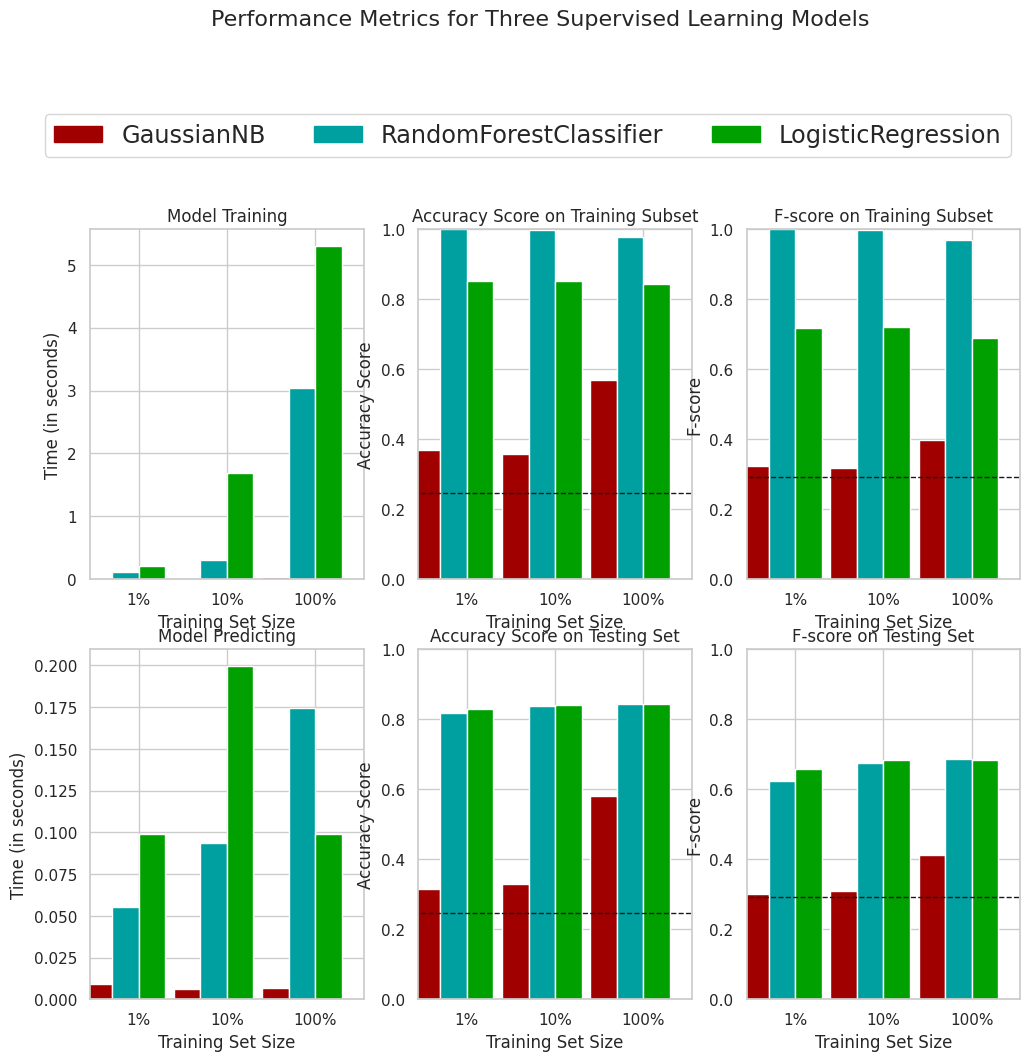

In [26]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


random_state = 42
# TODO: Initialize the three models
clf_A = GaussianNB()
clf_B = RandomForestClassifier(random_state= random_state)
clf_C = LogisticRegression(random_state = random_state)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(len(y_train)*.10)
samples_1 = int(len(y_train)*.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [27]:
allresults = {}
allresults.update(results)

SGDClassifier trained on 361 samples.
SGDClassifier trained on 3617 samples.
SGDClassifier trained on 36177 samples.
LinearSVC trained on 361 samples.


/opt/venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
/opt/venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC trained on 3617 samples.


/opt/venv/lib/python3.10/site-packages/sklearn/svm/_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(


LinearSVC trained on 36177 samples.
KNeighborsClassifier trained on 361 samples.
KNeighborsClassifier trained on 3617 samples.
KNeighborsClassifier trained on 36177 samples.


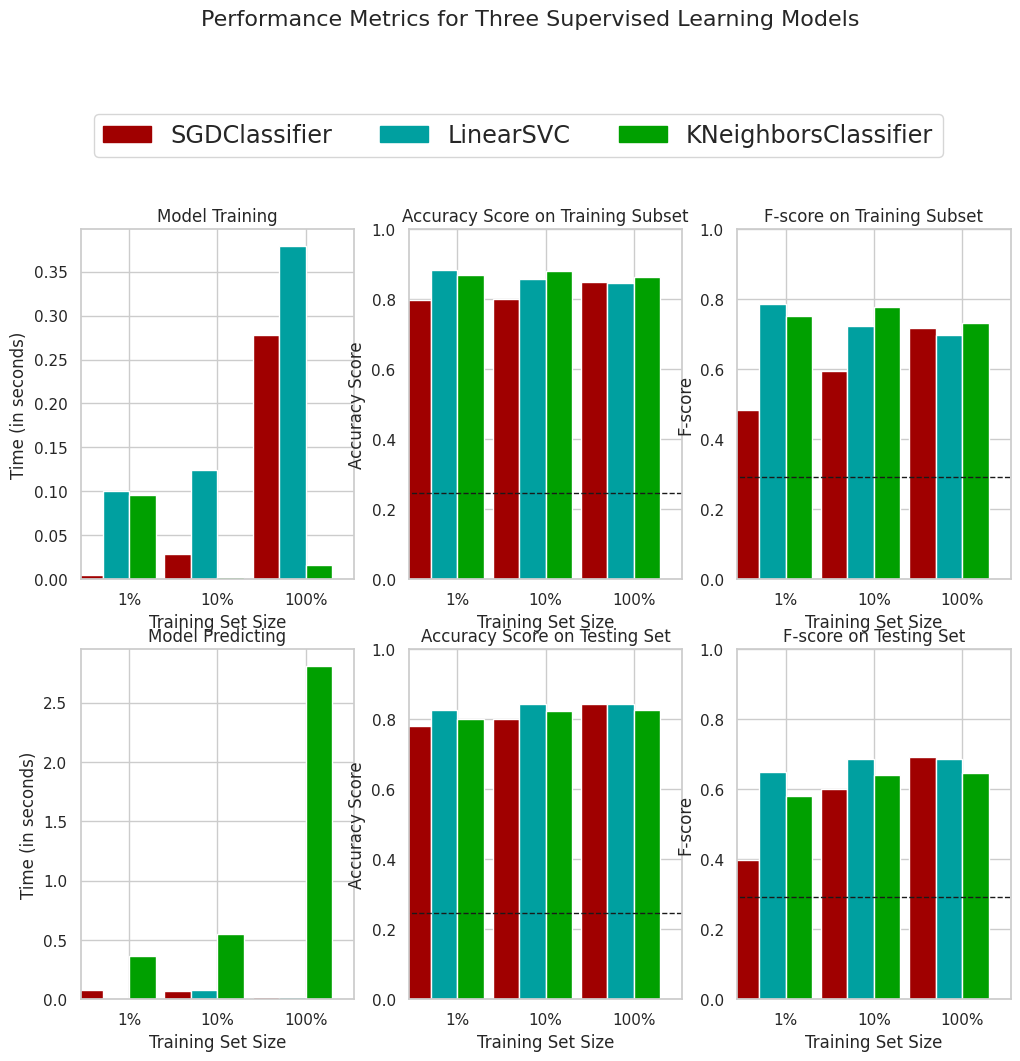

In [28]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.linear_model import SGDClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier


random_state = 42
# TODO: Initialize the three models
clf_A = SGDClassifier(random_state = random_state)
clf_B = LinearSVC(random_state= random_state)
clf_C = KNeighborsClassifier()

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(len(y_train)*.10)
samples_1 = int(len(y_train)*.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [29]:
allresults.update(results)

/opt/venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/opt/venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier trained on 361 samples.
AdaBoostClassifier trained on 3617 samples.


/opt/venv/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


AdaBoostClassifier trained on 36177 samples.
BaggingClassifier trained on 361 samples.
BaggingClassifier trained on 3617 samples.
BaggingClassifier trained on 36177 samples.
GradientBoostingClassifier trained on 361 samples.
GradientBoostingClassifier trained on 3617 samples.
GradientBoostingClassifier trained on 36177 samples.


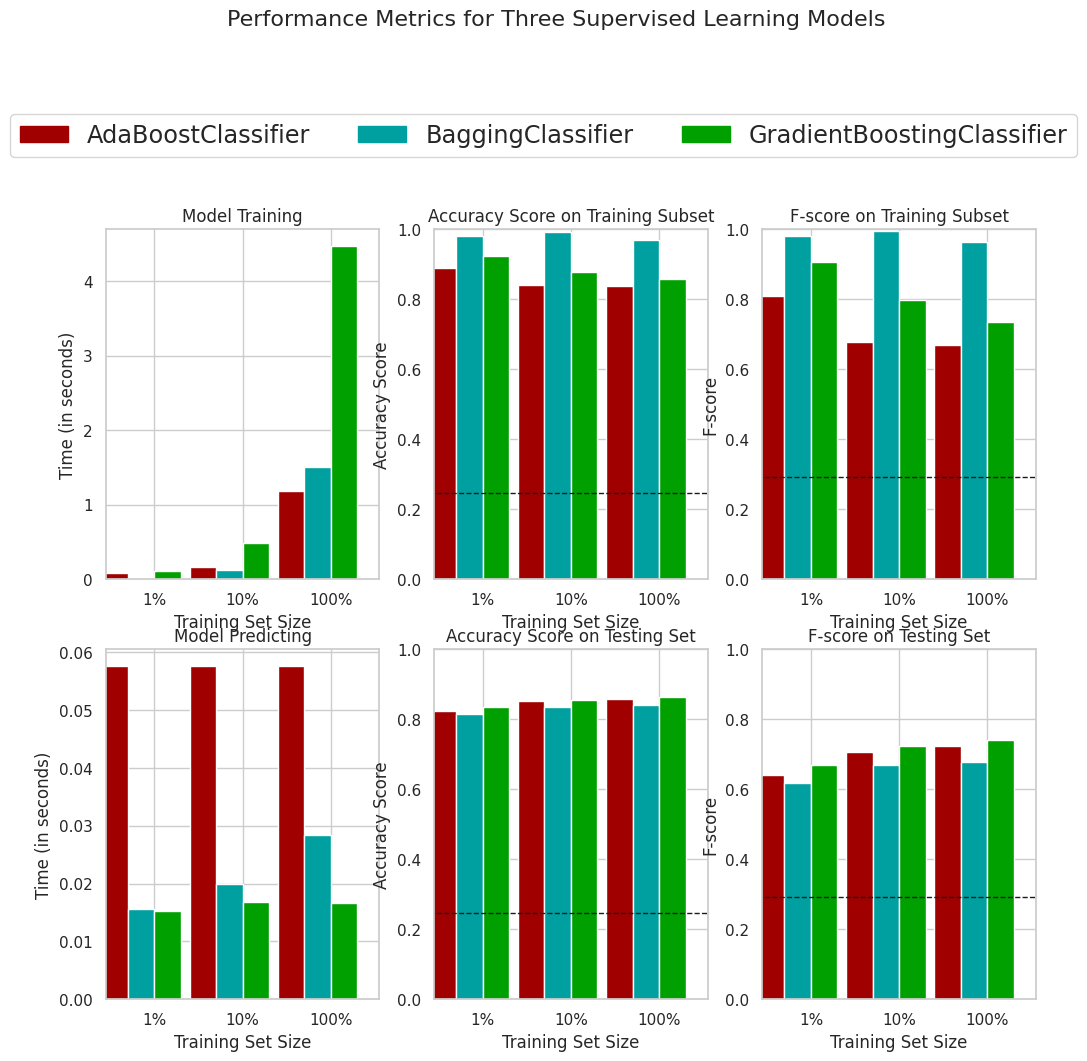

In [30]:
# TODO: Import the three supervised learning models from sklearn
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier


random_state = 42
# TODO: Initialize the three models
clf_A = AdaBoostClassifier(random_state = random_state)
clf_B = BaggingClassifier(random_state= random_state)
clf_C = GradientBoostingClassifier(random_state= random_state)

# TODO: Calculate the number of samples for 1%, 10%, and 100% of the training data
# HINT: samples_100 is the entire training set i.e. len(y_train)
# HINT: samples_10 is 10% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
# HINT: samples_1 is 1% of samples_100 (ensure to set the count of the values to be `int` and not `float`)
samples_100 = len(y_train)
samples_10 = int(len(y_train)*.10)
samples_1 = int(len(y_train)*.01)

# Collect results on the learners
results = {}
for clf in [clf_A, clf_B, clf_C]:
    clf_name = clf.__class__.__name__
    results[clf_name] = {}
    for i, samples in enumerate([samples_1, samples_10, samples_100]):
        results[clf_name][i] = \
        train_predict(clf, samples, X_train, y_train, X_test, y_test)

# Run metrics visualization for the three supervised learning models chosen
vs.evaluate(results, accuracy, fscore)

In [31]:
allresults.update(results)

In [32]:
headingrow = "| {algo:<30s} | {h_train_time:>12s} | {h_pred_time:>12s} | {h_acc_train:>12s} | {h_acc_test:>12s} | {h_f_train:>12s} | {h_f_test:>12s} |".format 
subhead = "| {algo:<119s}  |".format 
detailrow  = "| {iter:^30d} | {train_time:>12s} | {pred_time:>12s} | {acc_train:>12s} | {acc_test:>12s} | {f_train:>12s} | {f_test:>12s} |".format
i=0
for k, v in allresults.items():
    if i == 0:
        i = 1
        for k1, v1 in v.items():
            keys =  ["".join(k2) for k2, v2 in v1.items()]
            print(headingrow(algo="Algorithm/Iteration",
                            h_train_time= keys[0],
                            h_pred_time = keys[1],
                            h_acc_train = keys[2],
                            h_acc_test  = keys[3],
                            h_f_train   = keys[4],
                            h_f_test    = keys[5]
             ))
            break
    
    print(subhead(algo=k))
    

    for k1, v1 in v.items():
        keys = [k]+["".join(k2) for k2, v2 in v1.items()]
        values = [k1]+["".join('{0:.2f}'.format(v2*100)) for k2, v2 in v1.items()]
        if i==0:
            i=1

        
        print(detailrow(iter=values[0],
                        train_time=values[1],
                        pred_time=values[2],
                        acc_train=values[3],
                        acc_test=values[4],
                        f_train=values[5],
                        f_test=values[6]
        ))

| Algorithm/Iteration            |   train_time |    pred_time |    acc_train |     acc_test |      f_train |       f_test |
| GaussianNB                                                                                                               |
|               0                |         1.26 |         0.93 |        37.00 |        31.62 |        32.26 |        30.08 |
|               1                |         0.44 |         0.59 |        35.67 |        32.89 |        31.80 |        30.86 |
|               2                |         3.59 |         0.70 |        57.00 |        57.93 |        39.86 |        41.11 |
| RandomForestClassifier                                                                                                   |
|               0                |        11.63 |         5.52 |       100.00 |        81.69 |       100.00 |        62.44 |
|               1                |        31.06 |         9.33 |        99.67 |        83.77 |        99.72 |        67.39 |


----
## Improving Results
In this final section, you will choose from the three supervised learning models the *best* model to use on the student data. You will then perform a grid search optimization for the model over the entire training set (`X_train` and `y_train`) by tuning at least one parameter to improve upon the untuned model's F-score. 

### Question 3 - Choosing the Best Model

* Based on the evaluation you performed earlier, in one to two paragraphs, explain to *CharityML* which of the three models you believe to be most appropriate for the task of identifying individuals that make more than \$50,000. 

**HINT:** 
Look at the graph at the bottom left from the cell above(the visualization created by `vs.evaluate(results, accuracy, fscore)`) and check the F score for the testing set when 100% of the training set is used. Which model has the highest score? Your answer should include discussion of the:
* metrics - F score on the testing when 100% of the training data is used, 
* prediction/training time
* the algorithm's suitability for the data.

**Answer:**

#### **metrics**: gradientboost classifier had a f-score of 73.95% on the testing dataset compared to 73.41% on training
#### **prediction/training time**: It was little high at 7.29 seconds as compared to other models, however, the predictiontime was in the lower range at 0.02 seconds
#### **algorithm suitability**: its an additive ML model, by creating additional trees that reduces the residual from previous trees. We have a dataset with large feature set for binary classification, and this model incrementally corrects the predictions by learning from the previous trees.


### Question 4 - Describing the Model in Layman's Terms

* In one to two paragraphs, explain to *CharityML*, in layman's terms, how the final model chosen is supposed to work. Be sure that you are describing the major qualities of the model, such as how the model is trained and how the model makes a prediction. Avoid using advanced mathematical jargon, such as describing equations.

**HINT:**

When explaining your model, if using external resources please include all citations.

** answer **


##### Gradient Boosting is a Decision tree based algorithm. Lets first describe what is decision trees before describing gradient boosting. Decision trees employs divide and conquer strategy. A feature from the dataset is first chosen as root, then a second choosen feature splits the data into 2 or more branches (based on values), which is further divide the third features into one or more branches. The mannerism is akin to tree where we have trunk with braches coming out of the trunk or from other branches and finally the leaf, the data-value which is used for classification or prediction (regression).  With Gradient boosting, decision trees are formed, and the prediction are compared with the actual values. the difference between actual and predicted is then used to adjust the predicted value for the next iteration of creating a new decision tree. The process continues until we have created the max number of decision trees.


##### Gradient boosting is a type of machine learning boosting. It relies on the intuition that the best possible next model, when combined with previous models, minimizes the overall prediction error. The key idea is to set the target outcomes for this next model in order to minimize the error. [1] 

##### Algorithm starts with a single value, an average of the target value, and calculates the difference between the actual target value and the predicted value (average). It then creates the tree based on they hyperparameters, depth, number of trees, number of sample etc, and calculates the difference of prediction (based on new tree) vs the actual value. In order to gradually learn and avoid overshooting the target, the learning rate (between 0 and 1) is used to scale the predicted value and then added to the first prediction. So, at the end of the first tree creation we have an intuition, prediction from the first tree (times the learning rate), and calculate the new predictions. 

##### We repeat the steps by creating another tree with leaves as residuals b/w latest prediction and the target values and calculate new set of predictions.

##### The process continues until we fit the target predictions OR we have reach the maximum defined trees, at that state the training is complete.

##### In relation to other boosting algorithms, gradientboosting allows to adjust the depth of the tree, learning rate, min leaves etc.


Reference:
[1] https://www.displayr.com/gradient-boosting-the-coolest-kid-on-the-machine-learning-block/
[2] https://www.youtube.com/watch?v=3CC4N4z3GJc

### Implementation: Model Tuning
Fine tune the chosen model. Use grid search (`GridSearchCV`) with at least one important parameter tuned with at least 3 different values. You will need to use the entire training set for this. In the code cell below, you will need to implement the following:
- Import [`sklearn.grid_search.GridSearchCV`](http://scikit-learn.org/0.17/modules/generated/sklearn.grid_search.GridSearchCV.html) and [`sklearn.metrics.make_scorer`](http://scikit-learn.org/stable/modules/generated/sklearn.metrics.make_scorer.html).
- Initialize the classifier you've chosen and store it in `clf`.
 - Set a `random_state` if one is available to the same state you set before.
- Create a dictionary of parameters you wish to tune for the chosen model.
 - Example: `parameters = {'parameter' : [list of values]}`.
 - **Note:** Avoid tuning the `max_features` parameter of your learner if that parameter is available!
- Use `make_scorer` to create an `fbeta_score` scoring object (with $\beta = 0.5$).
- Perform grid search on the classifier `clf` using the `'scorer'`, and store it in `grid_obj`.
- Fit the grid search object to the training data (`X_train`, `y_train`), and store it in `grid_fit`.

**Note:** Depending on the algorithm chosen and the parameter list, the following implementation may take some time to run!

In [33]:
# TODO: Import 'GridSearchCV', 'make_scorer', and any other necessary libraries
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer


# TODO: Initialize the classifier
clf = GradientBoostingClassifier(random_state= random_state)

# TODO: Create the parameters list you wish to tune, using a dictionary if needed.
# HINT: parameters = {'parameter_1': [value1, value2], 'parameter_2': [value1, value2]}
parameters = {'learning_rate' : [0.05, 0.10], 
              'n_estimators'  : [100, 150],
              'max_depth'     : [3, 5]}

# Valid parameters are: ['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'].

# TODO: Make an fbeta_score scoring object using make_scorer()
scorer = make_scorer(fbeta_score, beta=0.5)

# TODO: Perform grid search on the classifier using 'scorer' as the scoring method using GridSearchCV()
grid_obj = GridSearchCV(clf, parameters)

# TODO: Fit the grid search object to the training data and find the optimal parameters using fit()
grid_fit = grid_obj.fit(X_train, y_train)

# Get the estimator
best_clf = grid_fit.best_estimator_

# Make predictions using the unoptimized and model
predictions = (clf.fit(X_train, y_train)).predict(X_test)
best_predictions = best_clf.predict(X_test)

# Report the before-and-afterscores
print("Unoptimized model\n------")
print("Accuracy score on testing data: {:.4f}".format(accuracy_score(y_test, predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, predictions, beta = 0.5)))
print("\nOptimized Model\n------")
print("Final accuracy score on the testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("Final F-score on the testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))

Unoptimized model
------
Accuracy score on testing data: 0.8636
F-score on testing data: 0.7408

Optimized Model
------
Final accuracy score on the testing data: 0.8685
Final F-score on the testing data: 0.7469


### Question 5 - Final Model Evaluation

* What is your optimized model's accuracy and F-score on the testing data? 
* Are these scores better or worse than the unoptimized model? 
* How do the results from your optimized model compare to the naive predictor benchmarks you found earlier in **Question 1**?_  

**Note:** Fill in the table below with your results, and then provide discussion in the **Answer** box.

#### Results:

|     Metric     | Unoptimized Model | Optimized Model |
| :------------: | :---------------: | :-------------: | 
| Accuracy Score |        0.8636           |        0.8685         |
| F-score        |        0.7408           |   0.7469       |


**Answer:**

----
## Feature Importance

An important task when performing supervised learning on a dataset like the census data we study here is determining which features provide the most predictive power. By focusing on the relationship between only a few crucial features and the target label we simplify our understanding of the phenomenon, which is most always a useful thing to do. In the case of this project, that means we wish to identify a small number of features that most strongly predict whether an individual makes at most or more than \$50,000.

Choose a scikit-learn classifier (e.g., adaboost, random forests) that has a `feature_importance_` attribute, which is a function that ranks the importance of features according to the chosen classifier.  In the next python cell fit this classifier to training set and use this attribute to determine the top 5 most important features for the census dataset.

### Question 6 - Feature Relevance Observation
When **Exploring the Data**, it was shown there are thirteen available features for each individual on record in the census data. Of these thirteen records, which five features do you believe to be most important for prediction, and in what order would you rank them and why?

**Answer:**


#### Intuitively, one could think of the following as a factor in determining the income level
- age 
- occupation 
- hours-per-week
- relationship
- capital-gains

### Implementation - Extracting Feature Importance
Choose a `scikit-learn` supervised learning algorithm that has a `feature_importance_` attribute availble for it. This attribute is a function that ranks the importance of each feature when making predictions based on the chosen algorithm.

In the code cell below, you will need to implement the following:
 - Import a supervised learning model from sklearn if it is different from the three used earlier.
 - Train the supervised model on the entire training set.
 - Extract the feature importances using `'.feature_importances_'`.

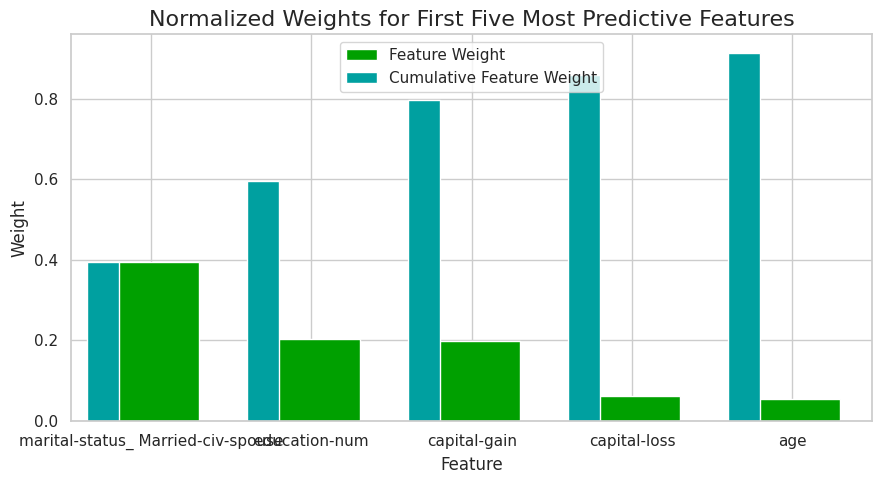

In [36]:
# TODO: Import a supervised learning model that has 'feature_importances_'
# RandomForest
clf = GradientBoostingClassifier(random_state= random_state)


# TODO: Train the supervised model on the training set using .fit(X_train, y_train)
model = clf.fit(X_train, y_train)

# TODO: Extract the feature importances using .feature_importances_ 
importances = model.feature_importances_

# Plot
vs.feature_plot(importances, X_train, y_train)

### Question 7 - Extracting Feature Importance

Observe the visualization created above which displays the five most relevant features for predicting if an individual makes at most or above \$50,000.  
* How do these five features compare to the five features you discussed in **Question 6**?
* If you were close to the same answer, how does this visualization confirm your thoughts? 
* If you were not close, why do you think these features are more relevant?

**Answer:**

####
- Marital Status (married-civ-spouse) - wasn't my intuition
- Education-num - wasn't my intuition
- Capital Gain - My intuition was number 5
- Capital Loss - wasn't my intuition
- Age - My intuition was number 1

#### Two (Age and capital gain) of the five features matches by intuition by Gradient boost. The age was the last priority, So in a way Gradientboost did well in the estimation but feature importance comes out to be different



### Feature Selection
How does a model perform if we only use a subset of all the available features in the data? With less features required to train, the expectation is that training and prediction time is much lower — at the cost of performance metrics. From the visualization above, we see that the top five most important features contribute more than half of the importance of **all** features present in the data. This hints that we can attempt to *reduce the feature space* and simplify the information required for the model to learn. The code cell below will use the same optimized model you found earlier, and train it on the same training set *with only the top five important features*. 

In [37]:
# Import functionality for cloning a model
from sklearn.base import clone

# Reduce the feature space
X_train_reduced = X_train[X_train.columns.values[(np.argsort(importances)[::-1])[:5]]]
X_test_reduced = X_test[X_test.columns.values[(np.argsort(importances)[::-1])[:5]]]

# Train on the "best" model found from grid search earlier
clf = (clone(best_clf)).fit(X_train_reduced, y_train)

# Make new predictions
reduced_predictions = clf.predict(X_test_reduced)

# Report scores from the final model using both versions of data
print("Final Model trained on full data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, best_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, best_predictions, beta = 0.5)))
print("\nFinal Model trained on reduced data\n------")
print("Accuracy on testing data: {:.4f}".format(accuracy_score(y_test, reduced_predictions)))
print("F-score on testing data: {:.4f}".format(fbeta_score(y_test, reduced_predictions, beta = 0.5)))

Final Model trained on full data
------
Accuracy on testing data: 0.8685
F-score on testing data: 0.7469

Final Model trained on reduced data
------
Accuracy on testing data: 0.8583
F-score on testing data: 0.7240


### Question 8 - Effects of Feature Selection

* How does the final model's F-score and accuracy score on the reduced data using only five features compare to those same scores when all features are used?
* If training time was a factor, would you consider using the reduced data as your training set?

**Answer:**

Surpringly, f-score had reduced when features were reduced from 0.7469 to 0.7240

the one other aspect which is not attempted during this exercise, was reducing the overall feature count. The categorical data was highly skewed, and by applying feature engineering techniques and consolidating categorical data to fewer categories, would have allowed to not only preserve important features, but also improves the training time.

the data set was also unbalanced from target variable standpoint to improve the recall beta in f-beta needed to be moved closer to 1 to prioritize recall.



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.